# Advanced

## Generate New Dataset

In [2]:
from diversify_maze import find_mazes, INFINITY
import numpy as np
# generate 1000 test cases
maps, init_states, goal_states = find_mazes(10, density=[100, 150], dist2goal_threshold=1)
np.savez('maze_files/mazes_new_dataset.npz', maps=maps, goal_states=goal_states, init_states=init_states)

len of new data: 9:   0%|          | 33/10000000 [00:00<23:20:42, 118.99it/s]


## Test on New Environment

In [3]:
from tqdm import tqdm
from config import set_random_seed
from str2name import str2name
import torch
from eval_gnn import explore

from environment import MazeEnv
env = MazeEnv(dim=2, map_file='maze_files/mazes_new_dataset.npz')
indexes = range(0, 1000)
bs = 100  # only sample 100 points
results = []

_, model, model_path, model_s, model_s_path = str2name(str(env))
model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))
model_s.load_state_dict(torch.load(model_s_path, map_location=torch.device("cpu")))
model.eval()
model_s.eval()

for i in tqdm(range(10)):
    
    env.init_new_problem(i)
    set_random_seed(1234)
    _, model, model_path, model_s, model_s_path = str2name(str(env))
    result = explore(env, model, model_s, smooth=True, smoother='model', batch=bs, t_max=bs, k=10) 
    
    results.append(result)

100%|██████████| 10/10 [00:01<00:00,  5.45it/s]


In [4]:
print(type(results[0]))
one_solution = results[1]

for key in one_solution:
    print(key)

print(one_solution["smooth_path"])


<class 'dict'>
c_explore
c_smooth
data
explored
forward
total
total_explore
success
t0
path
smooth_path
explored_edges
[array([ 0.524215  , -0.28800946], dtype=float32), array([ 0.28182563, -0.33998522], dtype=float32), array([ 0.23358515, -0.76097214], dtype=float32), array([-0.03389425, -0.7493368 ], dtype=float32), array([-0.04982259, -0.71249044], dtype=float32), array([-0.11323902, -0.5720148 ], dtype=float32), array([-0.3039824 , -0.63482255], dtype=float32), array([-0.22429529, -0.85997736], dtype=float32), array([-0.22805455, -0.8604931 ], dtype=float32), array([-0.8650893, -0.7613843], dtype=float32)]


In [5]:
# get the collision numbers
c_explores = [r['c_explore'] for r in results]

<Figure size 640x480 with 0 Axes>

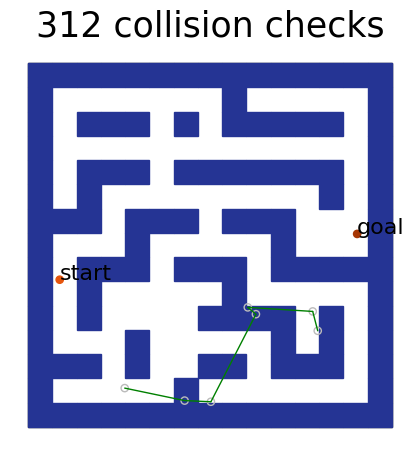

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from utils.plot import plot_edges
i = np.argmin(c_explores)
env.init_new_problem(i)
edges = results[i]['data'].v[ np.array(results[i]['explored_edges']).reshape(-1) ].reshape(-1, 2, 2)
edges = [[tuple(k), tuple(v)] for k, v in zip(edges[:, 0, :].cpu().numpy(), edges[:, 1, :].cpu().numpy())]
plot_optimization_edges(results[i]['smooth_path'], edges, env.get_problem(), \
           title='{0:d} collision checks'.format(results[i]['c_explore']), \
           save=None)
plt.show()

In [9]:
print(np.array(results[i]['explored_edges']).reshape(-1))
print(results[i]['data'].v[np.array(results[i]['explored_edges']).reshape(-1)])

[ 0  0  0 95 95  0 95 38 38 95 38  1  1 38 38 93 93 38 38 23 23 38 38  2
  2 38 38 76 76 38 38 71 71 38 38 66 66 38 66 59 59 66 66 36 36 66 66 79
 79 66 66 82 82 66 66  1  1 66 66 46 46 66 46 59 59 46 46 36 36 46 46 79
 79 46 79 80 80 79 79 59 59 79 79  1  1 79]
tensor([[-0.4691, -0.7871],
        [-0.4691, -0.7871],
        [-0.4691, -0.7871],
        [-0.0339, -0.7493],
        [-0.0339, -0.7493],
        [-0.4691, -0.7871],
        [-0.0339, -0.7493],
        [ 0.2818, -0.7476],
        [ 0.2818, -0.7476],
        [-0.0339, -0.7493],
        [ 0.2818, -0.7476],
        [ 0.5925, -0.4719],
        [ 0.5925, -0.4719],
        [ 0.2818, -0.7476],
        [ 0.2818, -0.7476],
        [ 0.8215, -0.5256],
        [ 0.8215, -0.5256],
        [ 0.2818, -0.7476],
        [ 0.2818, -0.7476],
        [ 0.7581, -0.4948],
        [ 0.7581, -0.4948],
        [ 0.2818, -0.7476],
        [ 0.2818, -0.7476],
        [ 0.5600, -0.4548],
        [ 0.5600, -0.4548],
        [ 0.2818, -0.7476],
        [

<Figure size 640x480 with 0 Axes>

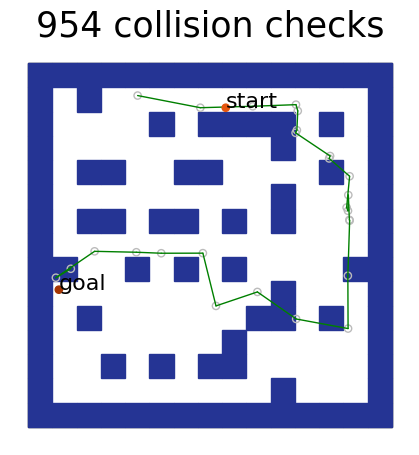

In [10]:
i = np.argmax(c_explores)
env.init_new_problem(i)
edges = results[i]['data'].v[np.array(results[i]['explored_edges']).reshape(-1)].reshape(-1, 2, 2)
edges = [[tuple(k), tuple(v)] for k, v in zip(edges[:, 0, :].cpu().numpy(), edges[:, 1, :].cpu().numpy())]
# print(results[i])
# print(results[i]['smooth_path'])
plot_optimization_edges(results[i]['smooth_path'], edges, env.get_problem(), \
           title='{0:d} collision checks'.format(results[i]['c_explore']), \
           save=None)
plt.show()